In [1]:
import sqlite3
import numpy as np
import pandas as pd

In [7]:
# read lat/lng data into panda dataframe
conn = sqlite3.connect('/Users/tanmaymahindrakar/Documents/FPA_FOD_20170508.sqlite')

df = pd.read_sql_query("SELECT latitude, longitude FROM fires;", conn)

lats = df['LATITUDE']
lons = df['LONGITUDE']

In [8]:
# bounding box of united states
# bbox_ll = [24.356308, -124.848974]
# bbox_ur = [49.384358, -66.885444] 

bbox_ll = [24.0, -125.0]
bbox_ur = [50.0, -66.0] 

# geographical center of united states
lat_0 = 39.833333
lon_0 = -98.583333

# compute appropriate bins to aggregate data
# nx is number of bins in x-axis, i.e. longitude
# ny is number of bins in y-axis, i.e. latitude
nx = 80
ny = 40

# form the bins
lon_bins = np.linspace(bbox_ll[1], bbox_ur[1], nx)
lat_bins = np.linspace(bbox_ll[0], bbox_ur[0], ny)

# aggregate the number of fires in each bin, we will only use the density
density, _, _ = np.histogram2d(lats, lons, [lat_bins, lon_bins])

# get the mesh for the lat and lon
lon_bins_2d, lat_bins_2d = np.meshgrid(lon_bins, lat_bins)

In [9]:
# # Here adding one row and column at the end of the matrix, so that 
# # density has same dimension as lat_bins_2d, lon_bins_2d, otherwise, 
# # using shading='gouraud' will raise error
density = np.hstack((density,np.zeros((density.shape[0],1))))
density = np.vstack((density,np.zeros((density.shape[1]))))

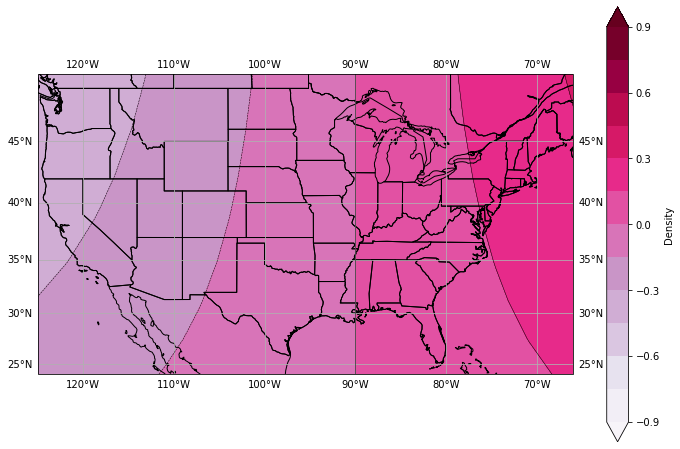

In [14]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np

# Example data for demonstration (you should replace these with your actual data)
lon_bins_2d, lat_bins_2d = np.meshgrid(np.linspace(-180, 180, 100), np.linspace(-90, 90, 50))
density = np.sin(np.radians(lat_bins_2d)) * np.cos(np.radians(lon_bins_2d))

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator())

# Set the extent of the map
ax.set_extent([bbox_ll[1], bbox_ur[1], bbox_ll[0], bbox_ur[0]], crs=ccrs.PlateCarree())

# Add coastlines, states, and countries
ax.coastlines()
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.BORDERS)

# Add gridlines
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# Create contour lines
CS1 = ax.contour(lon_bins_2d, lat_bins_2d, density, 15, linewidths=0.5, colors='k', transform=ccrs.PlateCarree())
# Fill between contour lines
CS2 = ax.contourf(lon_bins_2d, lat_bins_2d, density, 15, cmap=plt.cm.PuRd, extend='both', transform=ccrs.PlateCarree())

# Add colorbar
cbar = plt.colorbar(CS2, ax=ax, orientation='vertical')
cbar.set_label('Density')

plt.show()


## 

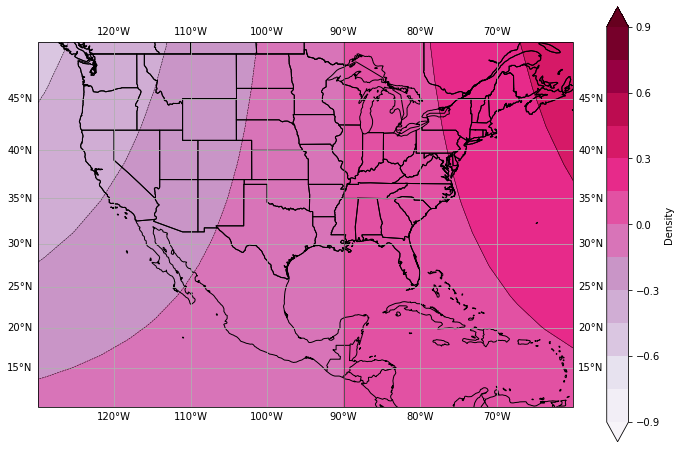

In [15]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np

# Example data (replace with your actual data)
lon_bins_2d, lat_bins_2d = np.meshgrid(np.linspace(-180, 180, 100), np.linspace(-90, 90, 50))
density = np.sin(np.radians(lat_bins_2d)) * np.cos(np.radians(lon_bins_2d))

# Define bounding box coordinates (replace with your actual bbox coordinates)
bbox_ll = [10, -130]  # [lat, lon] for lower left
bbox_ur = [50, -60]   # [lat, lon] for upper right

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator())

# Set the extent of the map
ax.set_extent([bbox_ll[1], bbox_ur[1], bbox_ll[0], bbox_ur[0]], crs=ccrs.PlateCarree())

# Add features to the map
ax.coastlines()
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.BORDERS)

# Add gridlines
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# Create contour lines
CS1 = ax.contour(lon_bins_2d, lat_bins_2d, density, 15, linewidths=0.5, colors='k', transform=ccrs.PlateCarree())

# Fill between contour lines
CS2 = ax.contourf(lon_bins_2d, lat_bins_2d, density, 15, cmap=plt.cm.PuRd, extend='both', transform=ccrs.PlateCarree())

# Add colorbar
cbar = plt.colorbar(CS2, ax=ax, orientation='vertical')
cbar.set_label('Density')

plt.show()
